# Import

In [274]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import pandas as pd
import numpy as np
import io

# Load data


In [247]:

from google.colab import files
uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_ids = test["PassengerId"] 

Saving test.csv to test (13).csv
Saving train.csv to train (13).csv


# Looking at the data

In [248]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [250]:
train.shape

(891, 12)

In [251]:
test.shape

(418, 11)

In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [253]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Features / Data Dictionary

**Survival**: 0 = No, 1 = Yes

**pclass**: 1 = 1st, 2 = 2nd, 3 = 3rd

**Ticket class**: 1 = 1st, 2 = 2nd, 3 = 3rd

**Sex**: male, female

**Age (in years)**: integer number value

**sibsp (number of siblings / spouses aboard)**: integer number value

**parch (number of parents / children aboard)**: integer number value

**ticket (ticket number)**: integer code

**fare (passenger fare cost)**: money value

**cabin (given cabin number)**: integer number value

**embarked (what port was embarked from)**: C = Cherbourg, Q = Queenstown, S = Southampton

In [254]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [255]:
# looking at all missing data points
missing_values_count = train.isnull().sum()
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [256]:
# total missing values
total_cells = np.product(train.shape)
total_missing_data = missing_values_count.sum()

# percent of data that is missing
percent_missing_data = (total_missing_data/total_cells) * 100
print(percent_missing_data)

8.099513655069211


In [257]:
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    return data

train = clean(train)
test = clean(test)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [258]:
train.dropna(thresh=2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Analyze

**reavent data**:
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Survived


In [259]:
def bar_chart_stacked(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, colormap="winter", figsize=(15,10))


Survived :
female    233
male      109
Name: Sex, dtype: int64

Dead:
male      468
female     81
Name: Sex, dtype: int64


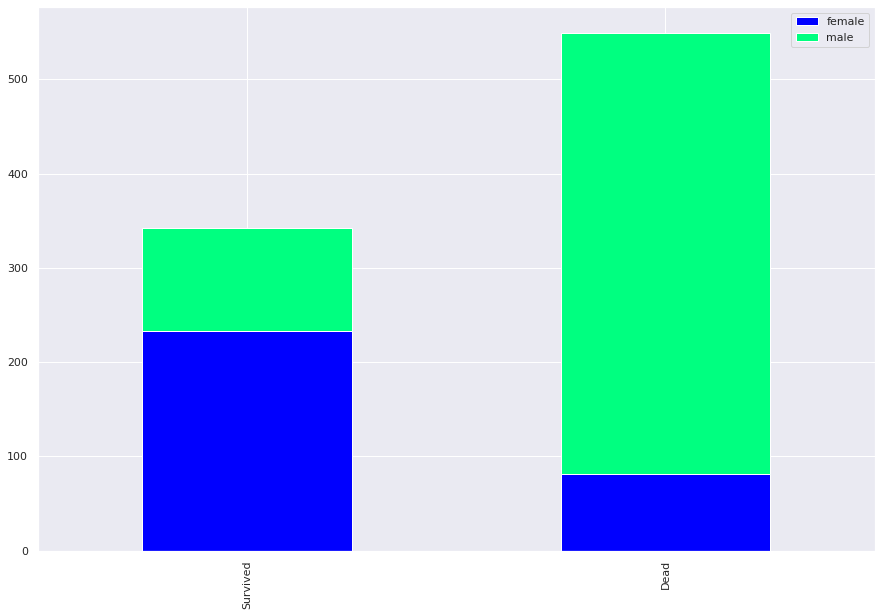

In [260]:
bar_chart_stacked('Sex')
print("Survived :")
print(train[train['Survived']==1]['Sex'].value_counts())
print("\nDead:")
print(train[train['Survived']==0]['Sex'].value_counts())

This chart shows that females are more likely to survive than males

In [261]:
def horizontal_barchart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='barh', stacked=False, colormap="winter", figsize=(15,10))

Survived: 
1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead: 
3    372
2     97
1     80
Name: Pclass, dtype: int64


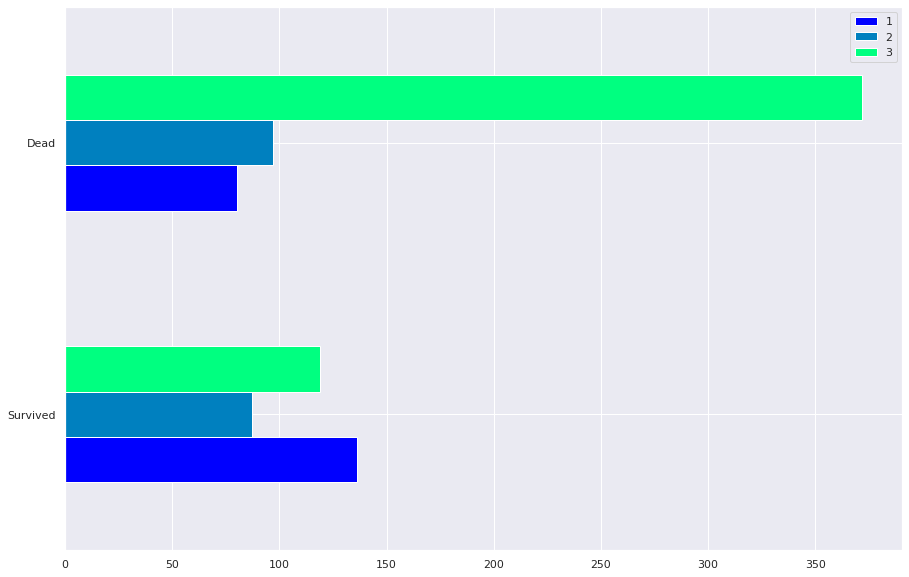

In [262]:
horizontal_barchart('Pclass')
print("Survived: ")
print(train[train['Survived']==1]['Pclass'].value_counts())
print("Dead: ")
print(train[train['Survived']==0]['Pclass'].value_counts())

This chart shows that 1st class was most likely to survive and 3rd class was most likely to die 

Survived:
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
S    427
C     75
Q     47
Name: Embarked, dtype: int64


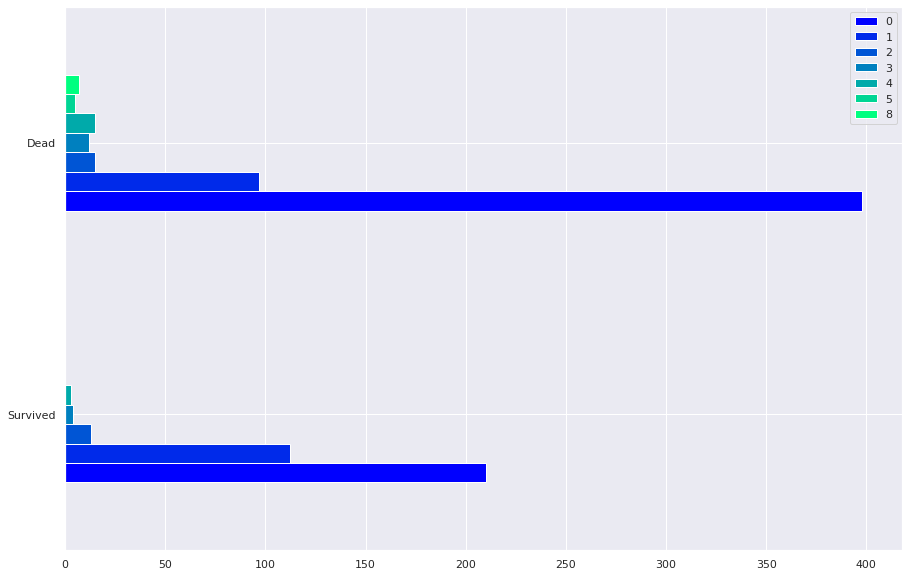

In [263]:
horizontal_barchart('SibSp')
print("Survived:")
print(train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:")
print(train[train['Survived']==0]['Embarked'].value_counts())

this chart shows that a person with (2 or more) siblings or a spouse was more likely to survive and a person withour any siblings or a spouse was more likely to die

Survived:
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


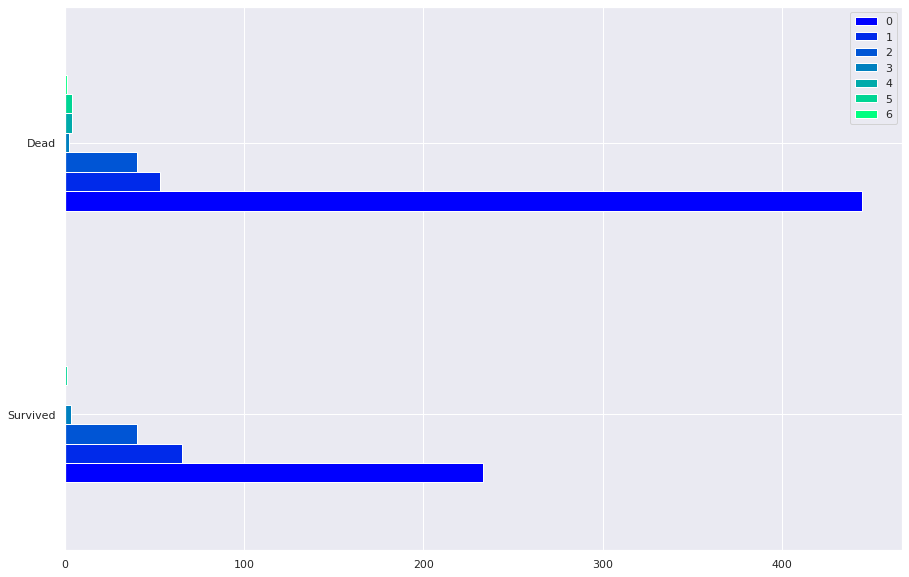

In [264]:
horizontal_barchart('Parch')
print("Survived:")
print(train[train['Survived']==1]['Parch'].value_counts())
print("Dead:")
print(train[train['Survived']==0]['Parch'].value_counts())

This chart shows that a person who was aboard alone was more likely to die

In [265]:
def pie_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='pie', colormap="winter", figsize=(15,10), subplots=True)

Survived:
S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
S    427
C     75
Q     47
Name: Embarked, dtype: int64


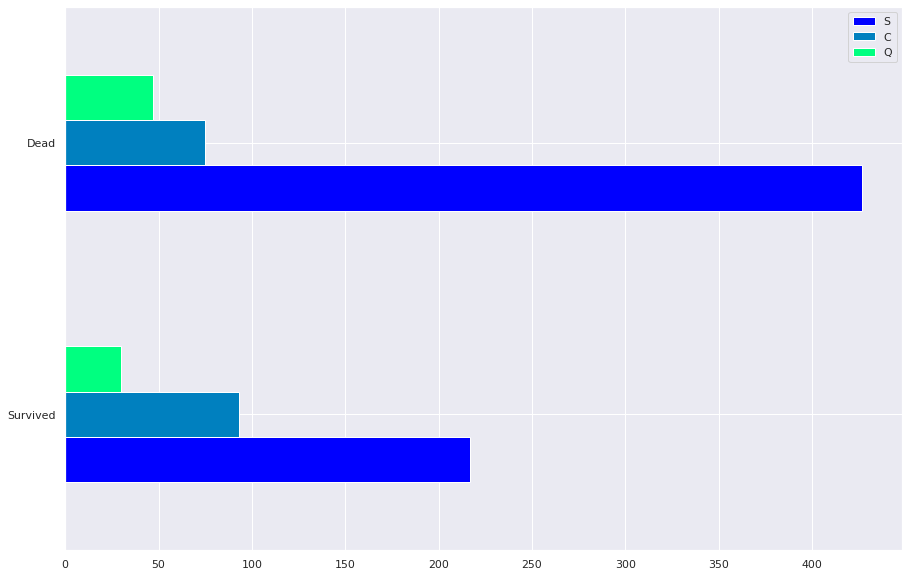

In [266]:
horizontal_barchart('Embarked')
print("Survived:")
print(train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:")
print(train[train['Survived']==0]['Embarked'].value_counts())

These charts show that C was slightly more likely survive, Q was more likely have died, and S was most likely to have died.

# Modeling

In [267]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
      
train.head(5)

['female' 'male']
['C' 'Q' 'S' nan]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = train["Survived"]
X = train.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [270]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8100558659217877

In [271]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predictions = clf.predict

In [272]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": predictions,
                  })

In [273]:
df.to_csv("submission.csv", index=False)